In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [4]:
# Generate summary statistics
df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# NO IMPUTATION NEEDED - b/c Not missing anything - NO NULL VALUES
# NO ENCODING - b/c ALl numeric data
## We have different MAX ranges from 4.840330 to 7852.089700, Min -13.527860 to - 17.567530 ==> Skewed as we do not have equal ranges.
# SCALAR needed. We should scale and normalize things out

In [6]:
# Plot your data to see what's in your DataFrame
df.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

# Pre-Processing

---

### Prepare the Data

In [7]:
 df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# NUMERIC
num_cols = ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

# Initalize and Fit the Scaler
ss = StandardScaler()
ss.fit(df.loc[:, num_cols])

# Transform the Data (Create /Display the scaled DataFrame)
df_scaled = pd.DataFrame(ss.transform(df.loc[:, num_cols]), columns=num_cols, index=df.index) # Set the coin_id column as index
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [9]:
df_scaled.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


---

### Find the Best Value for k Using the Original Scaled DataFrame.

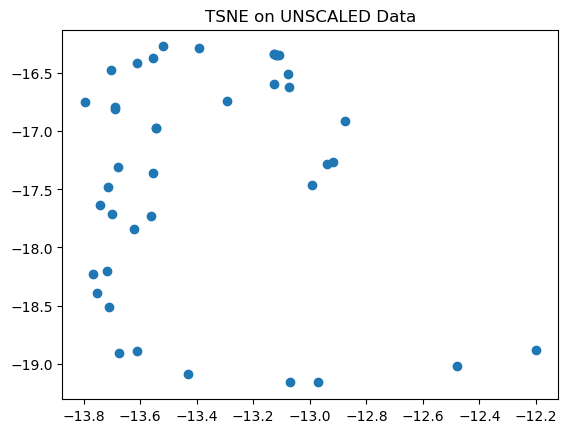

In [10]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df.loc[:, num_cols])) # fit UNSCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on UNSCALED Data")
plt.show()

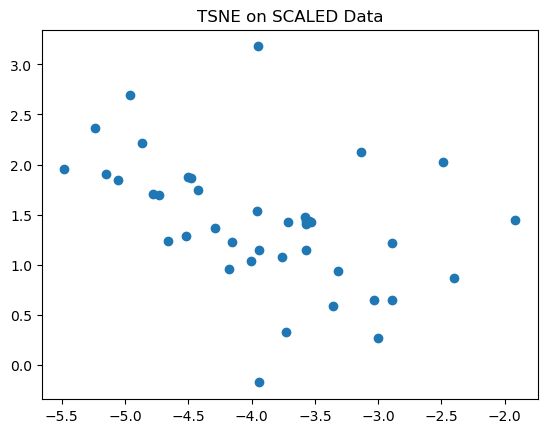

In [11]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [12]:
# Analysis:
## Hypothesis: Scaled data is better than the original data
## No clear cut clusters.

# Check for Multicollinearity

In [13]:
# Correlations
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


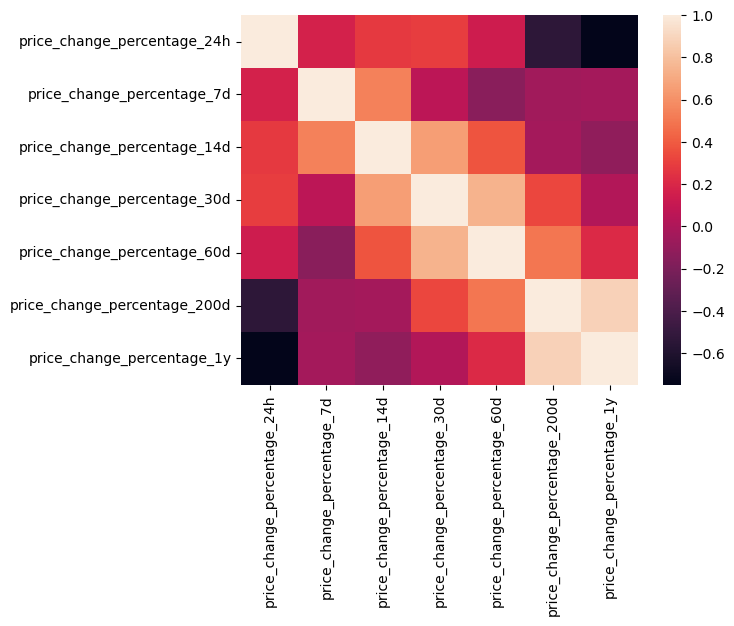

In [14]:
#heatmap
sns.heatmap(corrs)
plt.show()

In [15]:
# WE HAVE MULTICOLLINEARITY
# => WE CAN REDUCE OUR FEATURE SET BY USING PRINCIPAL COMPONENTS (PCA)

# Unsupervised Clustering on Scaled Data. Find the Best Value for k Using the Original Scaled DataFrame.
Kmeans uses randomness to assign the centroid locations.

In [16]:
# Define your "X" - features to predict
X = df_scaled

# Create a a list to store inertia values and the values of k
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 10)) # Limited to 10 b/c we have only 41 records

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_inertia = pd.DataFrame(metrics)

# Review the DataFrame
df_inertia.head(10)

,k,inertia,s_score,vrc_scores
0,2,212.123342,0.690885,13.766470
1,3,165.136752,0.260810,14.021117
2,4,79.022435,0.314482,32.459853
3,5,66.413051,0.323913,29.892958
4,6,61.634088,0.251616,25.595599
5,7,46.074467,0.258868,29.631263
6,8,43.392694,0.252185,26.466078
7,9,32.913223,0.260185,30.879599


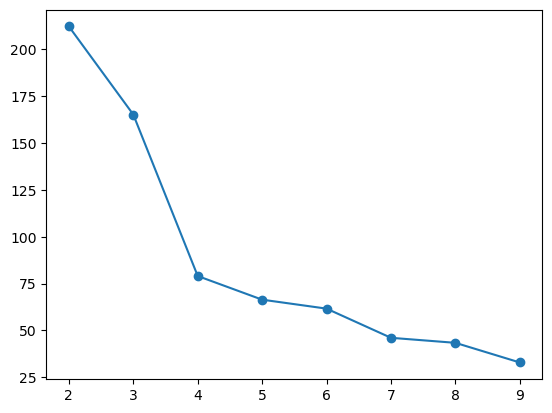

In [17]:
# Elbow Plot
plt.plot(df_inertia.k, df_inertia.inertia, marker="o")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The optimal number of clusters based on the elbow is 4. 

** Four clusters has a very good silhoutte score (ss) and Variance Ratio Criterion (VRC). 

## Agglomerative (Hierarchical) 
Doesn't have inertia nor elbow plot - It's the spore based version of clustering, with only one right answer. Look at all the distance and fit the closest one.


In [18]:
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.276114,30.023823
4,6,0.277295,29.858770
5,7,0.276363,30.467052
6,8,0.198534,31.166776
7,9,0.201693,30.667151


In [19]:
# Analysis: Silhouette score is highest at 4 (it's a little higher than ss of KMEANS). VRC is pretty good at 4 as well (but a little lower than VRC of KMeans.
# KMeans seems better

## BIRCH: is only useful for big data

In [20]:
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 11))

# LOOP 
for i in k:
    # Fit the Model
    model = Birch(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.707392,18.399507
1,3,0.702822,25.264783
2,4,0.340837,28.413892
3,5,0.336476,27.695263
4,6,0.185448,29.126884
5,7,0.193982,29.159036
6,8,0.197678,28.717616
7,9,0.194521,27.594528
8,10,0.194966,27.529234


In [21]:
# Kmeans of 4 seems the best algorithms here

# Visualize the best Algorithm

1) The best KMEANS PLOT of 4

In [22]:
# # Create a copy of the scaled DataFrame
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

#  Fit the K-Means model using the scaled DataFrame
model.fit(X)

# Make predictions of the clusters to group the cryptocurrencies using the scaled DataFrame
preds = model.predict(X)

# Add a new column (class column) with the labels to the scaled DataFrame with the predicted clusters
df_sub['clusters'] = preds

# Display the copy of the scaled DataFrame
df_sub.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


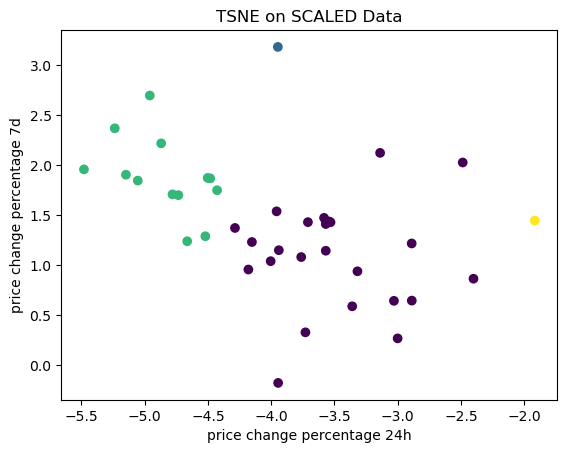

In [23]:
# Create a scatter plot using hvPlot by setting
# Fit the TISNI plot on the scaled data and then show clusters
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on SCALED Data")
plt.xlabel("price change percentage 24h")
plt.ylabel("price change percentage 7d")
plt.show()

In [24]:
#Optional: Use the best value for k to fit the K-means model.

best_k = 4  # Replace with the determined best k
kmeans = KMeans(n_clusters=best_k)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.predict(df_scaled)
df_scaled.hvplot.scatter(x='price_change_percentage_24h', 
                         y='price_change_percentage_7d', 
                         by='cluster', 
                         hover_cols=['coin_id'])

:NdOverlay   [cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

In [25]:
df_sub.loc[df_sub.clusters.isin([1,3])]

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
ethlend,-4.981042,-0.045178,-1.206956,-1.212126,0.047736,4.632380,6.088625,3
celsius-degree-token,1.045530,-0.618328,2.907054,5.351455,4.769913,3.148875,1.348488,1


2) Optional : Agglomerative plot og 5

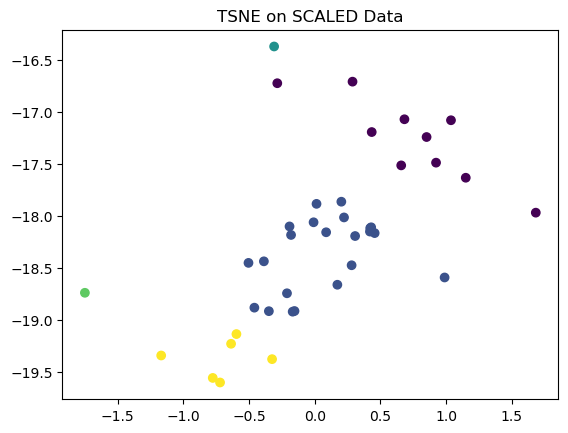

In [26]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = AgglomerativeClustering(n_clusters=5)

# Fit the model
model.fit(X)

# Make predictions
preds = model.labels_

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()
#############################################################

 # WE can fit the TISNI plot on the scaled data and then show clusters
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on SCALED Data")
plt.show()

# PRINCIPAL COMPONENTS (PCA)

In [27]:
# We have multi-collinearity (we are afflicted)

# Init PCA
n_components = len(df_scaled.columns)
pca = PCA(n_components=n_components)

# Fit the PCA model on the preprocessed DataFrame
pca_data = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

df_pca.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8
0,-0.126540,1.045901,0.457384,-0.102487,-0.044387,0.140119,-0.156598,-0.039411
1,-0.145964,0.649025,0.952869,0.124385,0.016817,-0.024560,-0.006771,0.113352
2,-0.424784,0.054888,-0.559328,-0.591735,0.089221,0.217777,0.108591,-0.038631
3,-0.472083,0.029058,-0.387016,-0.845422,-0.166734,0.209501,-0.127676,0.116468
4,-0.084210,2.382852,1.771350,0.380992,-0.190504,0.114844,-0.440203,-0.224853


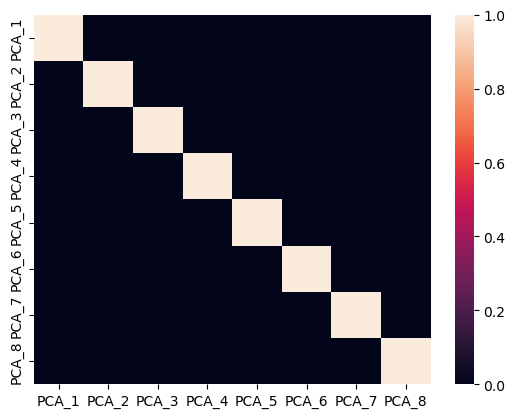

In [28]:
# sanity check Correlation
corrs = df_pca.corr()
# Correlation Heat map
sns.heatmap(corrs)
plt.show()

In [29]:
pca.explained_variance_ratio_
#the fist pca comprised 37 % of the infortmation stored in the df, the last pca less than 1

array([0.36961367, 0.34011221, 0.17259418, 0.05944868, 0.02614722,
       0.02158388, 0.00698252, 0.00351764])

In [30]:
sum(pca.explained_variance_ratio_)

1.0

In [31]:
sum(pca.explained_variance_ratio_[0:4]) # Sum the first 4 components equal 95% => keep 4 seems better than 3

0.9417687380278603

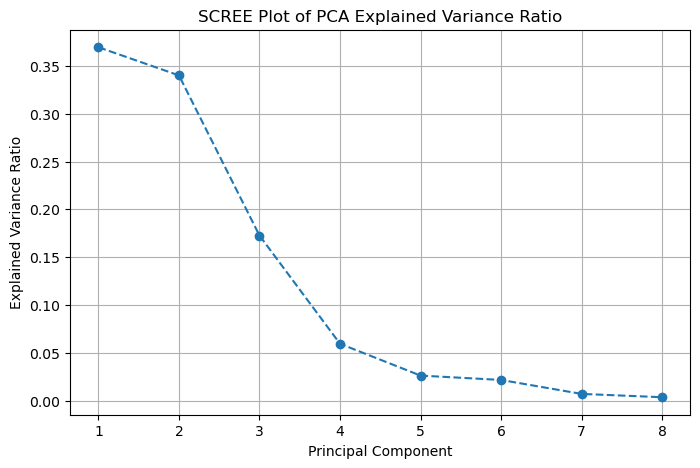

In [32]:
# For downstream linear type of modeling, we can also use PCA for dimensionality reduction 

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('SCREE Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [33]:
sum(pca.explained_variance_ratio_[0:3]) # 3 components equals 89% of the variance

0.8823200542812346

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950316570309841

In [34]:
df_pca = df_pca.loc[:, ["PCA_1", "PCA_2", "PCA_3"]]
df_pca.head()

,PCA_1,PCA_2,PCA_3
0,-0.126540,1.045901,0.457384
1,-0.145964,0.649025,0.952869
2,-0.424784,0.054888,-0.559328
3,-0.472083,0.029058,-0.387016
4,-0.084210,2.382852,1.771350


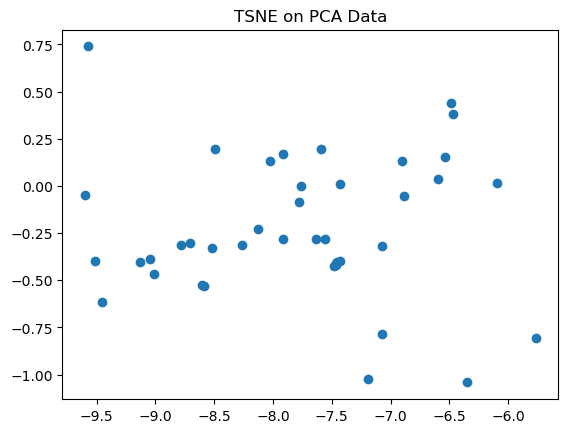

In [35]:
# Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca)) # fit PCA data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1])
plt.title("TSNE on PCA Data")
plt.show()

# Optimize Clusters with Principal Component Analysis.
# KMeans on PCA data

In [36]:
# Define your "X" - features to predict
X = df_pca

In [37]:
# Create a a list to store inertia values and the values of k
inertia = []
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(X)
    inertia.append(k_model.inertia_)

    # Silhoutte Score
    preds = k_model.predict(X)
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "inertia": inertia, "s_score": s_scores, "vrc_scores": vrc_scores}
df_cpa_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_cpa_metrics.head(10)

,k,inertia,s_score,vrc_scores
0,2,186.135457,0.732834,16.609184
1,3,138.670508,0.342122,17.364743
2,4,51.051176,0.409120,51.785520
3,5,37.216177,0.378803,55.183261
4,6,27.274183,0.393197,61.117282
5,7,23.234954,0.383012,59.062031
6,8,19.963756,0.290038,57.959317
7,9,16.579241,0.304988,60.033371


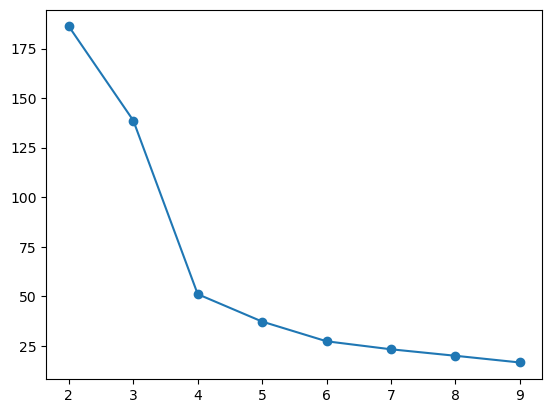

In [38]:
plt.plot(df_cpa_metrics.k, df_cpa_metrics.inertia, marker="o")
plt.show()

In [39]:
# WE have a better cluster with three principal components. KMeans of 4: our S_score and VRC are slighly higher (ss 0.420800 vrc 51.455694)
# Better fit with more clear cluster

# Agglomerative

In [40]:
# Create a a list to store metric values and the values of k
s_scores = []
vrc_scores = []

k = list(range(2, 10))

# LOOP 
for i in k:
    # Fit the Model
    model = AgglomerativeClustering(n_clusters=i)
    model.fit(X)

    # Silhoutte Score
    preds = model.labels_  # FIX: Use `labels_` instead of `predict()`
    s_score = silhouette_score(X, preds)
    s_scores.append(s_score)

    # Variance Ratio Criterion
    vrc_score = calinski_harabasz_score(X, preds)
    vrc_scores.append(vrc_score)

# Define a DataFrame to hold the values for k and the corresponding inertia
metrics = {"k": k, "s_score": s_scores, "vrc_scores": vrc_scores}
df_metrics = pd.DataFrame(metrics)

# Review the DataFrame
df_metrics.head(10)

,k,s_score,vrc_scores
0,2,0.746045,22.591795
1,3,0.744771,33.493399
2,4,0.411533,50.151523
3,5,0.355400,54.093633
4,6,0.368324,59.143374
5,7,0.362009,60.222438
6,8,0.297855,63.439349
7,9,0.305935,68.252987


In [41]:
# Make a copy
df_sub = X.copy()

# CHANGE THIS DEPENDING ON YOUR OPTIMAL k
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(X)

# Make predictions
preds = model.predict(X)

# Add a class column with the labels to the df DataFrame
df_sub['clusters'] = preds

df_sub.head()

,PCA_1,PCA_2,PCA_3,clusters
0,-0.126540,1.045901,0.457384,2
1,-0.145964,0.649025,0.952869,2
2,-0.424784,0.054888,-0.559328,0
3,-0.472083,0.029058,-0.387016,0
4,-0.084210,2.382852,1.771350,2


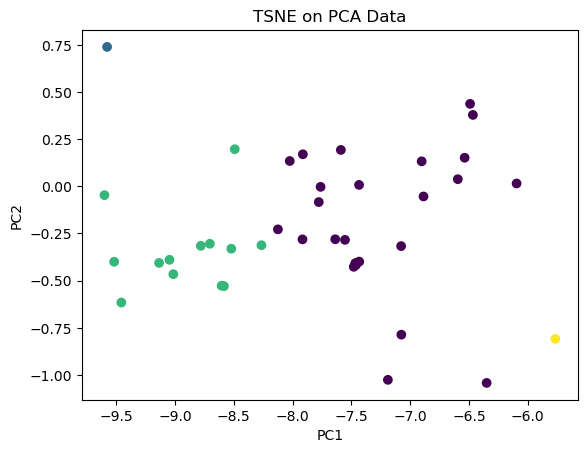

In [42]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_pca)) # fit PCA data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on PCA Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

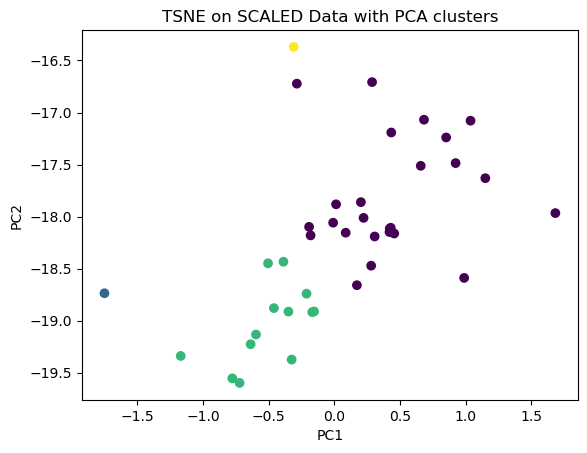

In [43]:
 # Can this even be clustered?
tsne = TSNE(random_state=42)
df_tsne = pd.DataFrame(tsne.fit_transform(df_scaled)) # fit SCALED data first

# Plot the clusters
plt.scatter(df_tsne[0], df_tsne[1], c=df_sub.clusters)
plt.title("TSNE on SCALED Data with PCA clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**  Kmeans of 4: (SS 0.420800	VRC51.455694)


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It makes almost the same clusters between the PCA and original one before dropping, because we have only 41 rows. The PCA should be a little better because we dropped less important components.

# Visualizing and Comparing the Results of two DataFrames (Scaled vs. Scaled PCA)

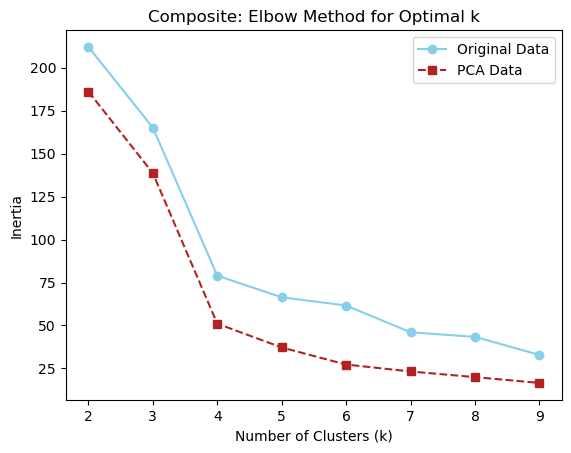

In [44]:
#Composite plot to contrast the Elbow curves

# Plot the elbow curves
plt.plot(df_inertia.k, df_inertia.inertia, marker='o', linestyle='-', label='Original Data', color='Skyblue')
plt.plot(df_cpa_metrics.k, df_cpa_metrics.inertia, marker='s', linestyle='--', label='PCA Data', color='Firebrick')

# Add labels and title
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Composite: Elbow Method for Optimal k")
plt.legend()

# Show the composite plot
plt.show()

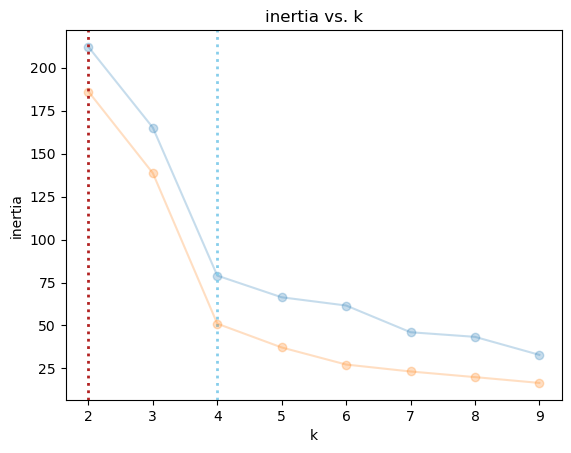

In [45]:
# Optional:
# figure
plt.plot(df_inertia["k"], df_inertia["inertia"], marker="o", alpha=.25)
plt.axvline(x=4, color="Skyblue", linestyle=":", linewidth=2)

plt.plot(df_cpa_metrics["k"], df_cpa_metrics["inertia"], marker="o", alpha=.25)
plt.axvline(x=2, color="Firebrick", linestyle=":", linewidth=2)

# formatting
plt.title("inertia vs. k")
plt.xlabel("k")
plt.ylabel("inertia")

# show
plt.show()

In [46]:
# Create a copy of the scaled PCA DataFrame
df_pca_sub = X.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_sub['clusters'] = preds

# Display the copy of the scaled PCA DataFrame
df_pca_sub.head()

,PCA_1,PCA_2,PCA_3,clusters
0,-0.126540,1.045901,0.457384,2
1,-0.145964,0.649025,0.952869,2
2,-0.424784,0.054888,-0.559328,0
3,-0.472083,0.029058,-0.387016,0
4,-0.084210,2.382852,1.771350,2


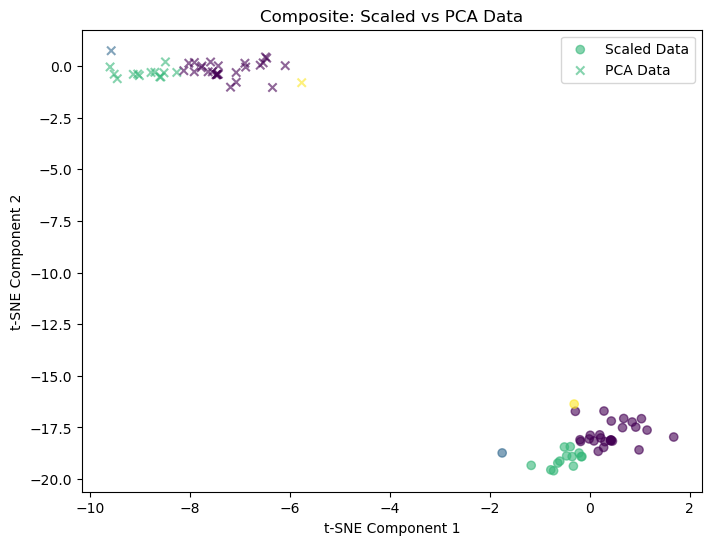

In [47]:
# Composite plot to contrast the clusters
# Scaled Data
tsne = TSNE(random_state=42)
df_tsne_scaled = pd.DataFrame(tsne.fit_transform(df_scaled), index=df_scaled.index)

# PCA Data
tsne = TSNE(random_state=42)
df_tsne_pca = pd.DataFrame(tsne.fit_transform(df_pca), index=df_pca.index)

# Create a figure
plt.figure(figsize=(8, 6))

# Plot both clusters
plt.scatter(df_tsne_scaled[0], df_tsne_scaled[1], c=df_sub.clusters, marker='o', alpha=0.6, label='Scaled Data')
plt.scatter(df_tsne_pca[0], df_tsne_pca[1], c=df_pca_sub.clusters, marker='x', alpha=0.6, label='PCA Data')

# Labels, Title, and Legend
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Composite: Scaled vs PCA Data")
plt.legend()

# Show the plot
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** while using fewer features can simplify the clustering process and improve performance in some cases, it's essential to carefully consider which features to retain to ensure that the clustering remains meaningful and accurate.